<a href="https://colab.research.google.com/github/Sachin0527/my_project1/blob/master/creditCardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [36]:
credit_card_data = pd.read_csv('https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1')
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [37]:
credit_card_data.sample()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
10833,18499.0,1.174507,-0.581353,0.900373,-1.172601,-1.072855,-0.253388,-0.798117,0.02762,3.052311,...,-0.168956,-0.033319,-0.09385,0.021584,0.38415,-0.095084,0.015447,0.012687,40.12,0


In [38]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [39]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [40]:
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [41]:
legit=credit_card_data[credit_card_data.Class==0]
fraud=credit_card_data[credit_card_data.Class==1]

In [42]:
fraud['Class']

541       1
623       1
4920      1
6108      1
6329      1
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 492, dtype: int64

In [43]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [44]:
fraud.Amount.describe()


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [45]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [46]:
legit_sample = legit.sample(n=492)

In [47]:
new_df = pd.concat([legit_sample,fraud],axis=0)

In [48]:
new_df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
81198,58827.0,-0.628604,-2.763631,-0.877590,1.905540,-1.099312,-0.240110,1.439454,-0.318747,-0.191068,...,0.586545,-0.351279,-0.992400,0.383976,0.454271,-0.393391,-0.174695,0.167413,950.40,0
192007,129497.0,1.948752,-0.409378,-0.402572,0.253301,-0.499868,-0.052242,-0.668890,0.199590,1.136746,...,-0.142065,-0.373448,0.411133,0.694307,-0.473803,-0.675145,0.020801,-0.035323,6.95,0
65814,51757.0,-2.334705,2.490136,-0.241586,0.732436,-0.791710,-0.517337,-0.385109,1.213329,-0.299955,...,0.186138,0.551697,0.067910,0.063952,-0.156786,-0.362407,-0.594358,-0.352616,0.99,0
166039,117822.0,1.873501,-1.292506,-1.898019,-0.376750,-0.302375,-0.313058,-0.182886,-0.206041,-0.066789,...,-0.009603,0.137327,-0.174894,0.013225,0.223711,-0.023733,-0.036527,-0.024956,190.00,0
121952,76380.0,-1.144835,1.152753,1.955880,0.622462,-0.362553,0.863647,-0.261957,0.993070,-0.677555,...,0.097487,0.231372,-0.076790,-0.341675,0.032181,-0.313820,0.245173,0.073987,18.42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [49]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93579.211382,-0.069077,0.031153,-0.031778,-0.034702,-0.062971,0.060297,0.052404,-0.037582,0.035074,...,-0.044462,-0.019502,0.011476,-0.025528,0.054421,-0.021746,0.004365,0.016380,0.000411,92.911951
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [50]:
X= new_df.drop(columns='Class',axis=1)
Y=new_df['Class']

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [52]:
model=LogisticRegression()

In [53]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9440914866581956


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9289340101522843


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [57]:
y_pred_proba = model.predict_proba(X_test)[:,1]

In [ ]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

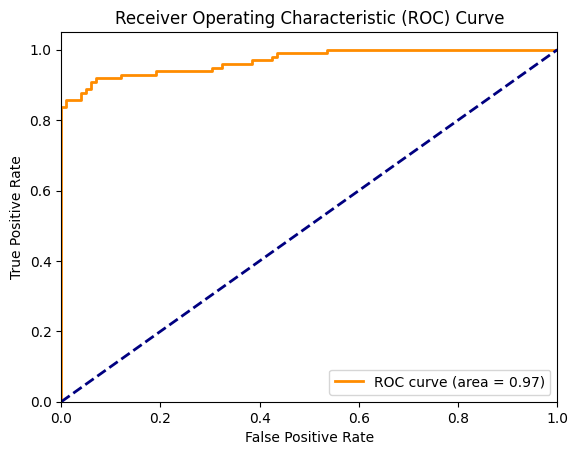

In [58]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [72]:
# Create a DataFrame with the values of features v1 and v2
new_data = pd.DataFrame({'Time':[1],
                         'V1': [-1.35981],
                         'V2': [-0.07278],
                         'V3': [2.535347],
                         'V4': [1.378155],
                         'V5': [-0.33832],
                         'V6': [0.462388],
                         'V7': [0.239599],
                         'V8': [0.098698],
                         'V9': [0.090794],
                         'V10': [0.363687],
                         'V11': [-0.5516],
                         'V12': [-0.6178],
                         'V13': [-0.99139],
                         'V14': [-0.3117],
                         'V15': [1.468177],
                         'V16': [-0.4704],
                         'V17': [0.207971],
                         'V18': [0.207971],
                         'V19': [0.403993],
                         'V20': [0.0251412],
                         'V21': [-0.018131],
                         'V22': [0.277838],
                         'V23': [-0.11047],
                         'V24': [0.066928],
                         'V25': [0.128239],
                         'V26': [-0.18911],
                         'V27': [0.122558],
                         'V28': [-0.02105],
                         'Amount':[149.62]

                        })

# Make predictions on the new data
predictions = model.predict(new_data)

# Print the predictions
print("Predicted values:", predictions)

Predicted values: [0]


In [69]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Print the predicted values
print("Predicted values:", y_pred)

# Assuming class 1 corresponds to fraud and class 0 corresponds to legitimate transactions
# Threshold for classifying as fraud (you may adjust this threshold as needed)
fraud_threshold = 0.5

# Determine if each transaction is fraud or legit based on the threshold
predictions = ['Fraud' if pred == 1 else 'Legitimate' for pred in y_pred]

# Print the predictions
for i, prediction in enumerate(predictions):
    print(f"Transaction {i+1}: {prediction}")

Predicted values: [1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0
 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0
 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0
 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 0 1 1 0 1 1 1 0]
Transaction 1: Fraud
Transaction 2: Fraud
Transaction 3: Legitimate
Transaction 4: Legitimate
Transaction 5: Fraud
Transaction 6: Legitimate
Transaction 7: Fraud
Transaction 8: Fraud
Transaction 9: Legitimate
Transaction 10: Fraud
Transaction 11: Legitimate
Transaction 12: Fraud
Transaction 13: Fraud
Transaction 14: Legitimate
Transaction 15: Legitimate
Transaction 16: Fraud
Transaction 17: Legitimate
Transaction 18: Fraud
Transaction 19: Legitimate
Transaction 20: Fraud
Transaction 21: Legitimate
Transaction 22: Legitimate
Transaction 23: Legitimate
Transaction 24: Fraud
Tr